In [ ]:
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Hacemos que lea el archivo de datyos diarios de Durango
url = 'https://raw.githubusercontent.com/CarlosSanchez03/Fisica-computacional1/main/Actividad1/diario%20durango.txt'
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()
# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)
# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')
df_work2 = df_work1.copy()

# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15527 entries, 0 to 15526
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   15527 non-null  datetime64[ns]
 1   Precip  15464 non-null  float64       
 2   Evap    13129 non-null  float64       
 3   Tmax    15260 non-null  float64       
 4   Tmin    15260 non-null  float64       
 5   Año     15527 non-null  int64         
 6   Mes     15527 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 849.3+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1941-01-01     0.0   3.3  19.5   3.5  1941  Jan
1 1941-01-02     0.0   3.8  21.5   2.5  1941  Jan
2 1941-01-03     0.0   5.8  23.5   5.5  1941  Jan
3 1941-01-04     0.0   5.7  19.0   7.5  1941  Jan
4 1941-01-05     0.0   5.0  21.5  -4.5  1941  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
15522 2000-12-27     0.4   3.6  12.5   8.0  2000  Dec
15523

In [ ]:
#Se hace una copia del df
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
#print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15527 entries, 1941-01-01 to 2000-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  15464 non-null  float64
 1   Evap    13129 non-null  float64
 2   Tmax    15260 non-null  float64
 3   Tmin    15260 non-null  float64
 4   Año     15527 non-null  int64  
 5   Mes     15527 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 849.1+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1941-01-01     0.0   3.3  19.5   3.5  1941  Jan
1941-01-02     0.0   3.8  21.5   2.5  1941  Jan
1941-01-03     0.0   5.8  23.5   5.5  1941  Jan
1941-01-04     0.0   5.7  19.0   7.5  1941  Jan
1941-01-05     0.0   5.0  21.5  -4.5  1941  Jan


In [ ]:
df_40 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_80 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2010)]

In [ ]:
df_90.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1980-01-01,0.0,5.6,22.0,-1.0,1980,Jan
1980-01-02,0.0,5.2,19.0,3.0,1980,Jan
1980-01-03,0.0,5.3,19.0,2.0,1980,Jan
1980-01-04,0.0,4.7,19.0,-3.0,1980,Jan
1980-01-05,0.0,3.7,21.0,0.5,1980,Jan


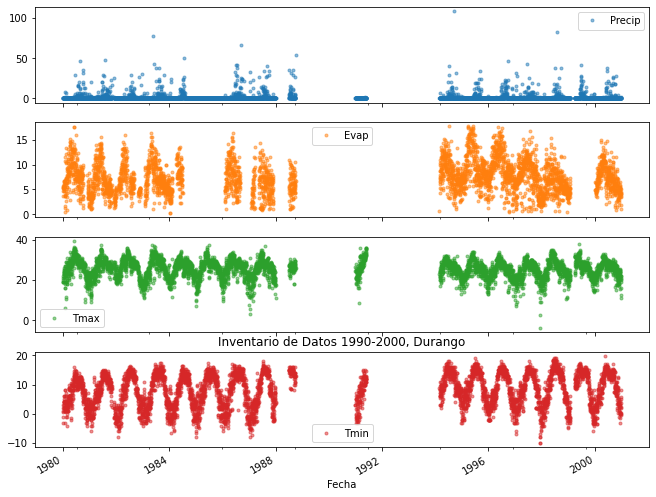

In [ ]:
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1990-2000, Durango');

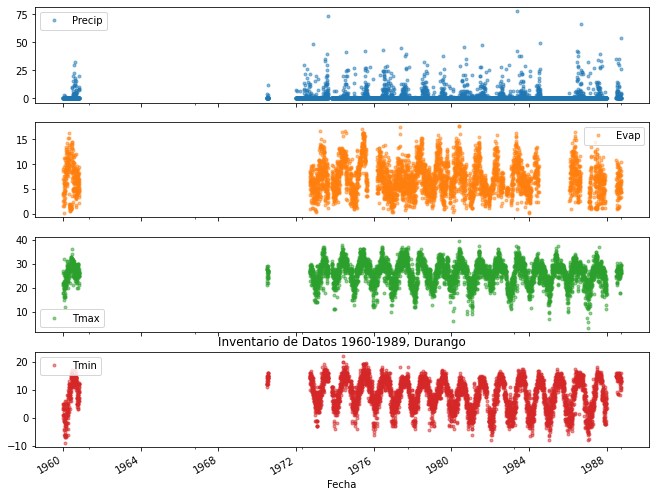

In [ ]:
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_60[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1960-1989, Durango');


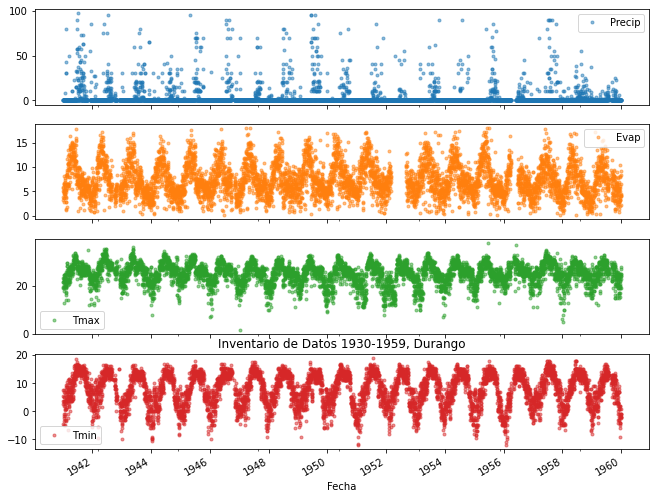

In [ ]:
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_30[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1930-1959, Durango');

Variación en Precipitación promedio 60-30 : -1.6016299281315105
Variación en Precipitación promedio 90-60 : -0.09560442650186851


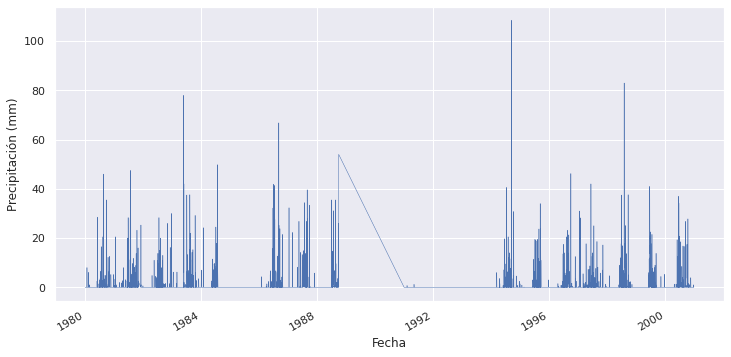

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos algunos promedios de cada época de 30 años
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()
Precip_ave_30 = df_30.Precip.mean()

# Graficamos la precipitación de la epoca 90 a la actualidad
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

# Calculamos diferencias de los promedios de precipitación
print('Variación en Precipitación promedio 60-30 :', Precip_ave_60-Precip_ave_30)
print('Variación en Precipitación promedio 90-60 :', Precip_ave_90-Precip_ave_60)

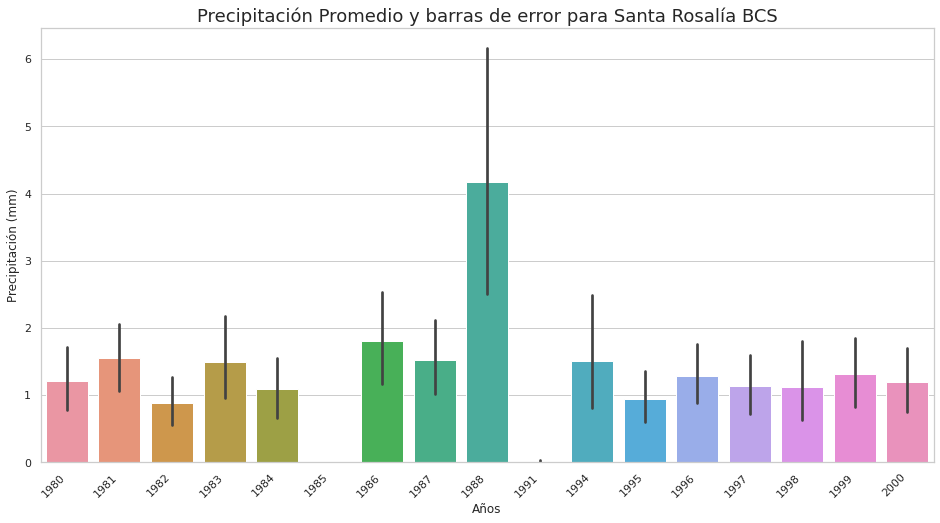

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 30 años de datos usando la columna 'Año' en el eje x
g =sns.barplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Santa Rosalía BCS', fontsize=18)

plt.show()

Variación ºC Tmax promedio 90s-60s : -0.6019672091535568


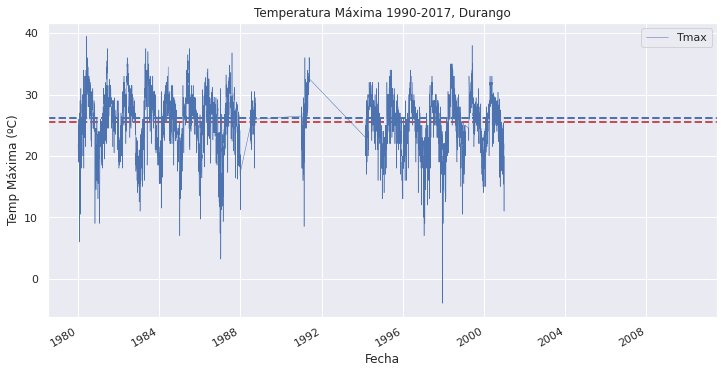

In [ ]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2001)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()

# Graficar líneas promedios (rojo 1990-2017, azul 1960-1989)
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1990-2017, Durango')

plt.legend();

# Imprime la diferencia de Temperaturas promedio entre épocas 
print('Variación ºC Tmax promedio 90s-60s :', Tmax_ave_90-Tmax_ave_60)

Variación ºC Tmin promedio 90s-60s : -0.15512712557837283


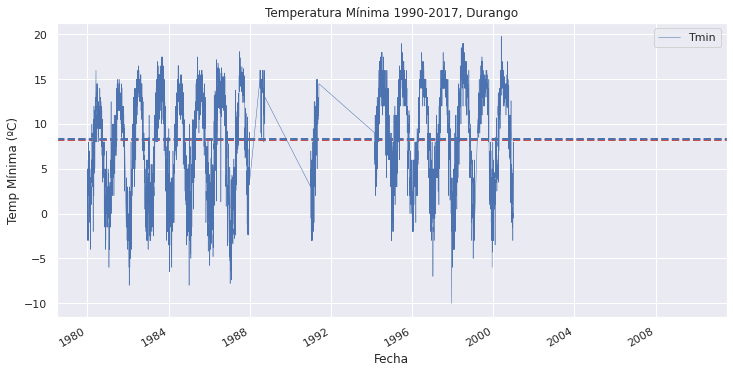

In [ ]:
# Hacemos lo mismo que la gráfica anterior con la Tmin
# Graficamos la Tmin de los últimos 30 años (1990-hasta 2001)
sns.set(rc={'figure.figsize':(12, 6)})

Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()

plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1990-2017, Durango')

plt.legend();



print('Variación ºC Tmin promedio 90s-60s :', Tmin_ave_90-Tmin_ave_60)

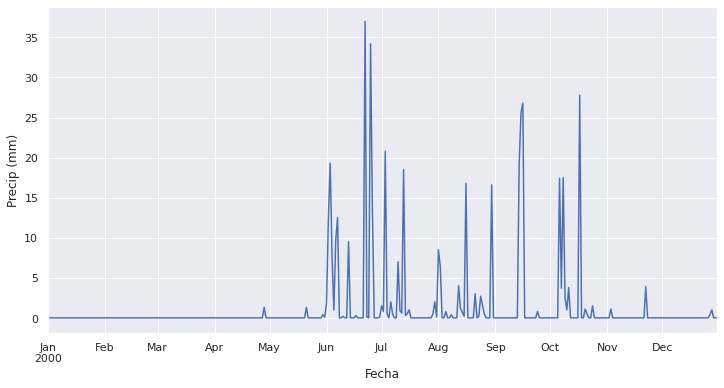

In [ ]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2000', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

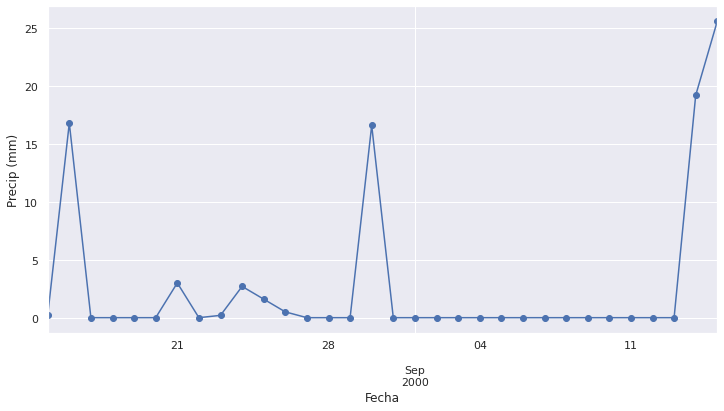

In [ ]:
# Investigando un periodo de datos con df.loc()
ax = df_90.loc['2000-08-15':'2000-09-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

Evaporacion : 0.33349109865085413


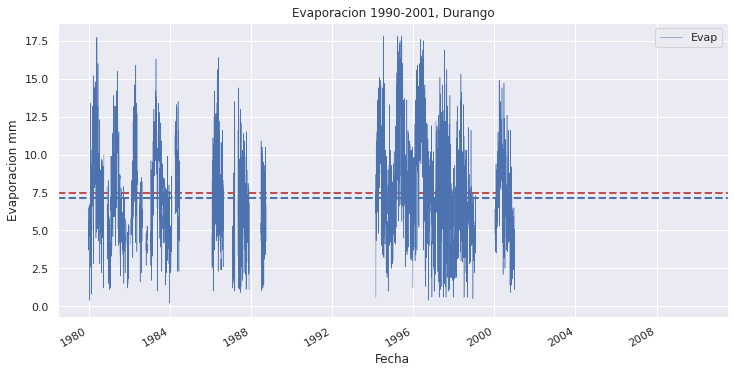

In [ ]:
# Graficamos la Evap de los últimos 30 años (1990-hasta 2001)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Evap_ave_90 = df_90.Evap.mean()
Evap_ave_60 = df_60.Evap.mean()

# Graficar líneas promedios (rojo 1990-2017, azul 1960-1989)
plt.axhline(Evap_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_60, color = 'b', linestyle='--', linewidth=2);

# Graficar la Evaporacion
df_90['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporacion mm');
plt.title('Evaporacion 1990-2001, Durango')

plt.legend();

# Imprime la diferencia de Evaporacion promedio entre épocas 
print('Evaporacion :', Evap_ave_90-Evap_ave_60)

In [ ]:
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

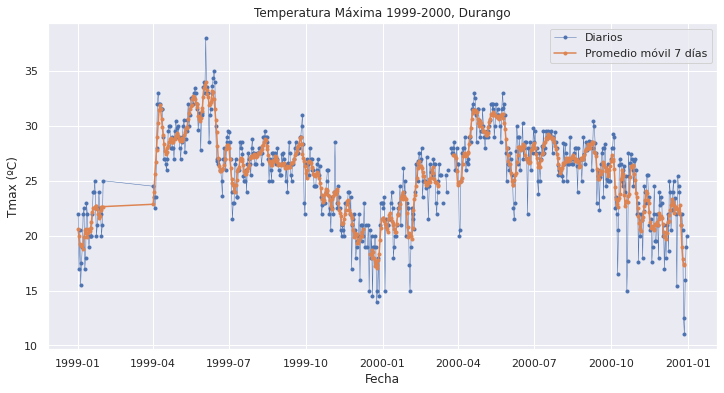

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-01', '2000-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1999-2000, Durango')
ax.legend();

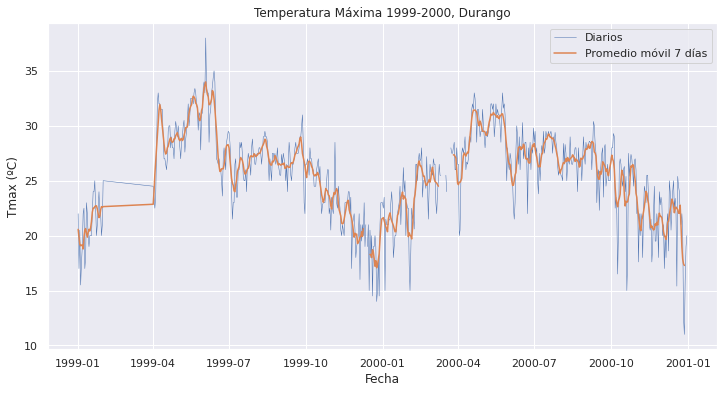

In [ ]:
# Misma gráfica anterior pero sin marcadores '.'
# Fechas de inicio y fin, para filtrar la información
start, end = '1999-01', '2000-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1999-2000, Durango')
ax.legend();

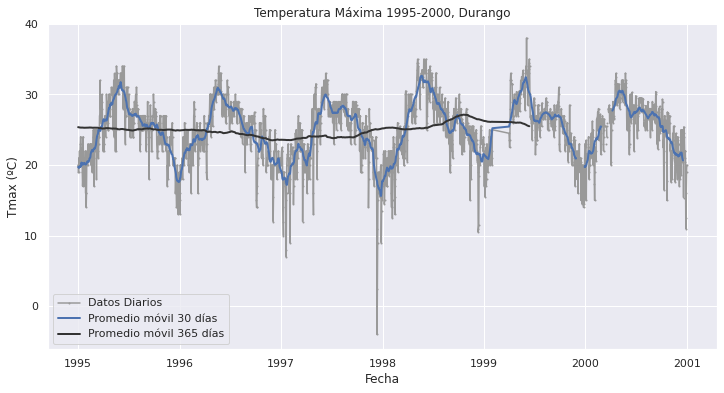

In [ ]:
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '1995-01', '2000-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 1995-2000, Durango')
ax.legend();

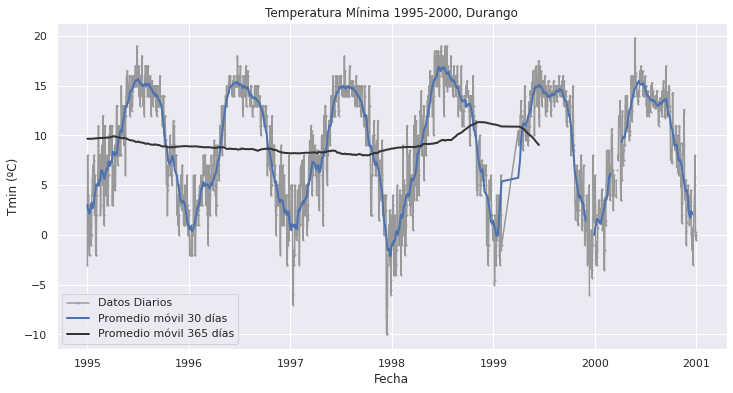

In [ ]:
# Tendencias ... año con año para Tmin

# Fechas de inicio y fin, para filtrar la información
start, end = '1995-01', '2000-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 1995-2000, Durango')
ax.legend();

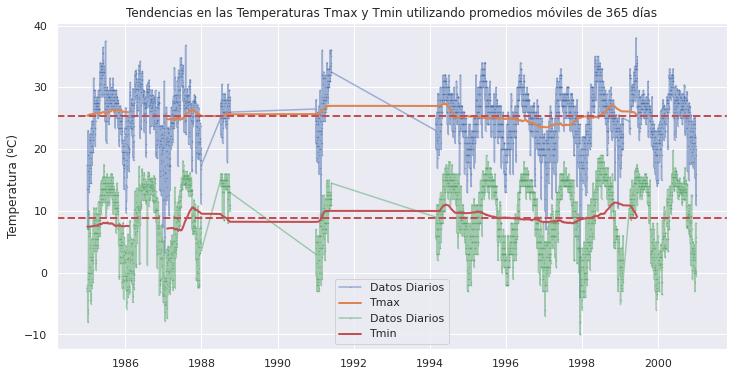

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1985-01', '2000-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

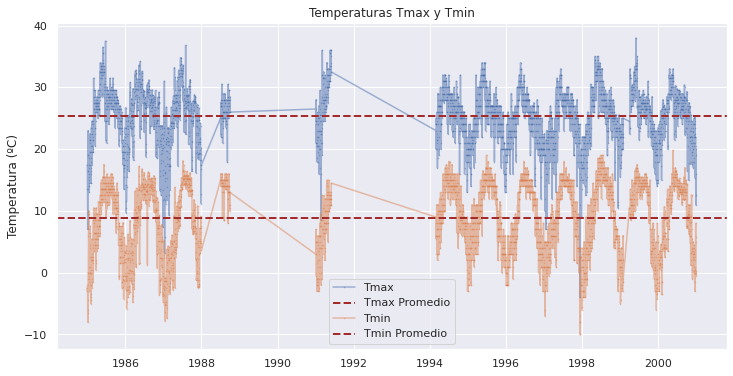

In [ ]:
#Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1985-01', '2000-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

In [ ]:
df_90_365d.info()
print(df_90_365d.head(185))
print(df_90_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5574 entries, 1980-01-01 to 2000-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    694 non-null    float64
 1   Tmax    4458 non-null   float64
 2   Tmin    4459 non-null   float64
dtypes: float64(3)
memory usage: 334.2 KB
            Evap       Tmax      Tmin
Fecha                                
1980-01-01   NaN        NaN       NaN
1980-01-02   NaN        NaN       NaN
1980-01-03   NaN        NaN       NaN
1980-01-04   NaN        NaN       NaN
1980-01-05   NaN        NaN       NaN
...          ...        ...       ...
1980-06-29   NaN        NaN       NaN
1980-06-30   NaN        NaN       NaN
1980-07-01   NaN  26.097260  6.491781
1980-07-02   NaN  26.093151  6.500000
1980-07-03   NaN  26.095890  6.489041

[185 rows x 3 columns]
            Evap  Tmax  Tmin
Fecha                       
2000-06-30   NaN   NaN   NaN
2000-07-01   NaN   NaN   NaN
2000-07-02   Na

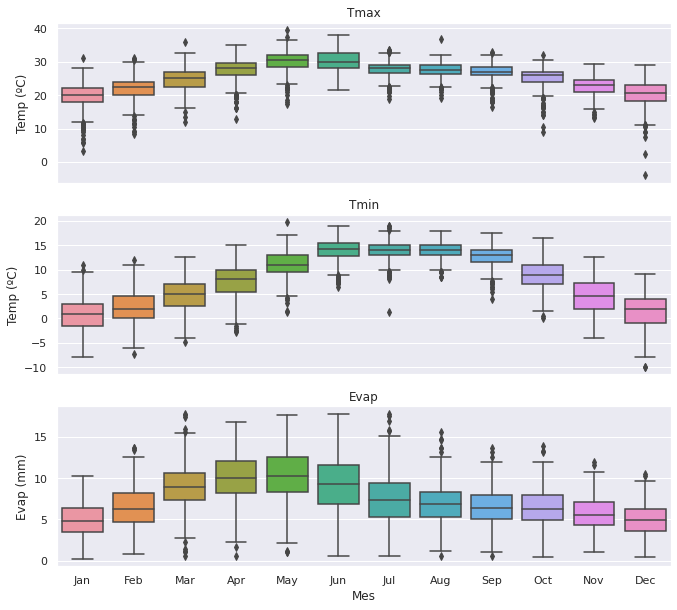

In [ ]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

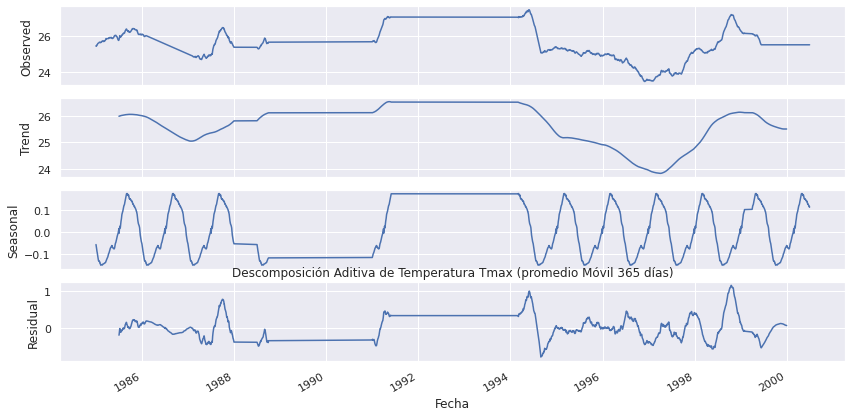

In [ ]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

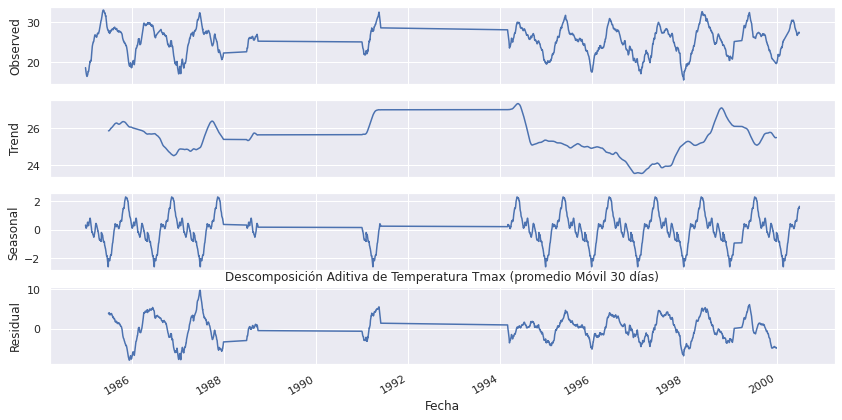

In [ ]:
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

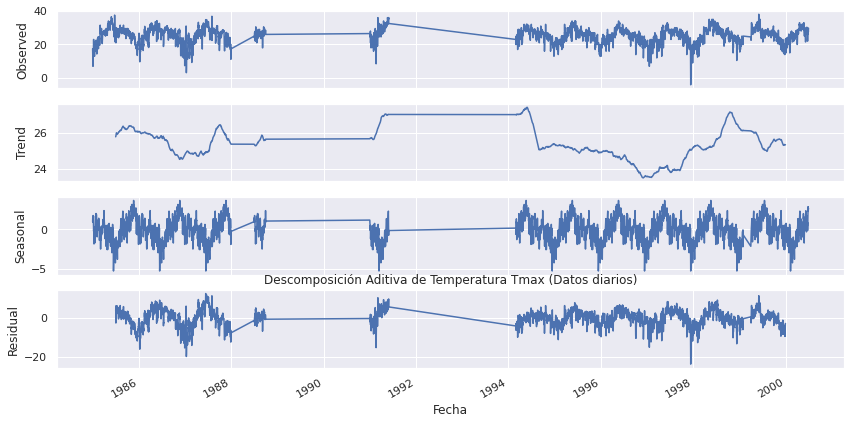

In [ ]:
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

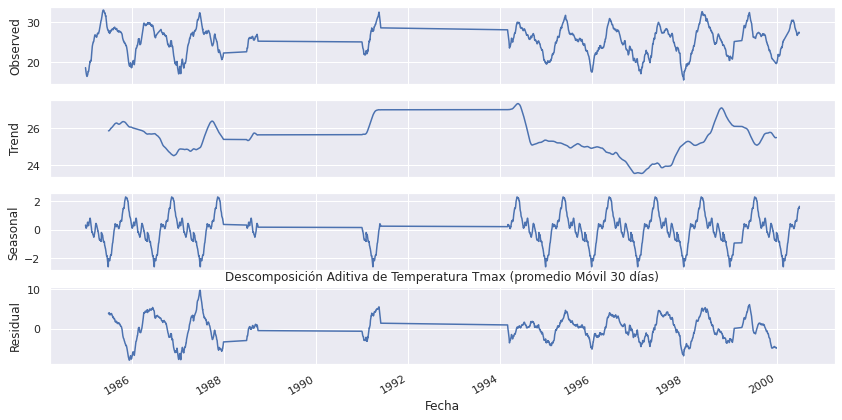

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

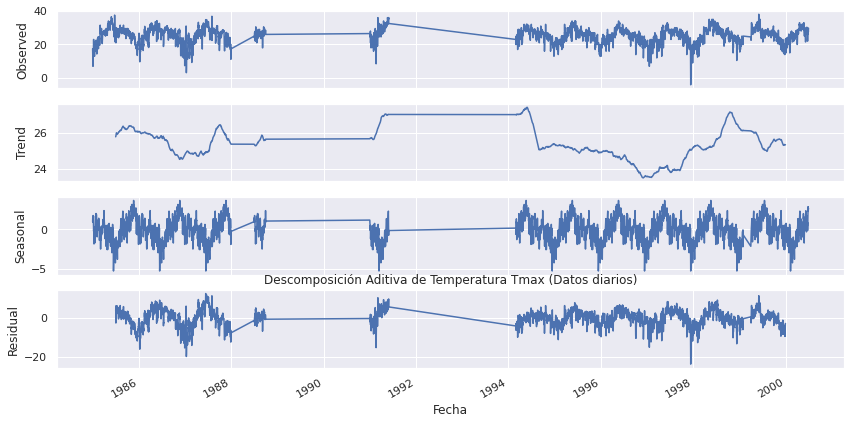

In [ ]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

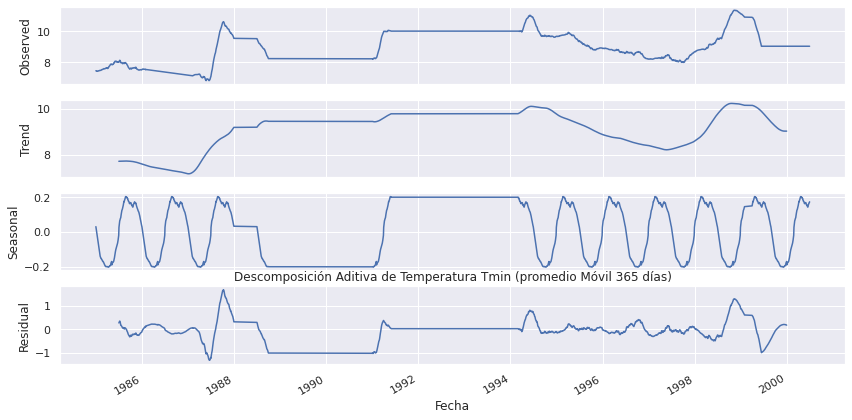

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

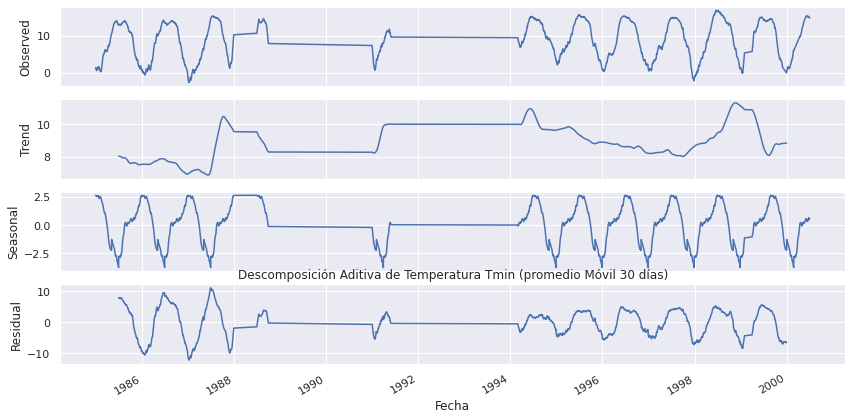

In [ ]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

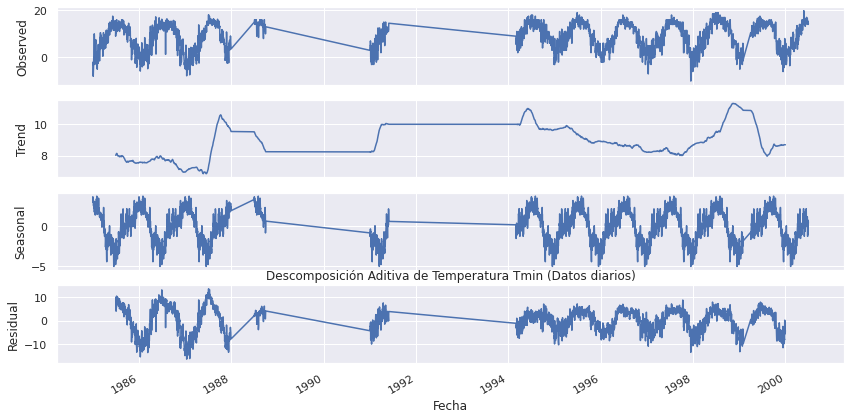

In [ ]:
# Caso: Uso de datos diarios.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1985-01', '2000-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

In [ ]:
resTmax.trend.describe()

count    3229.000000
mean       25.343558
std         0.860600
min        23.498630
25%        24.893151
50%        25.241096
75%        25.937260
max        27.404110
Name: Tmax, dtype: float64

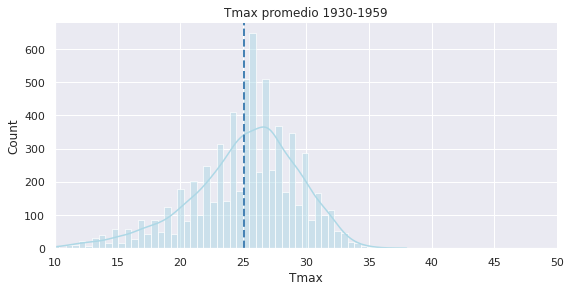

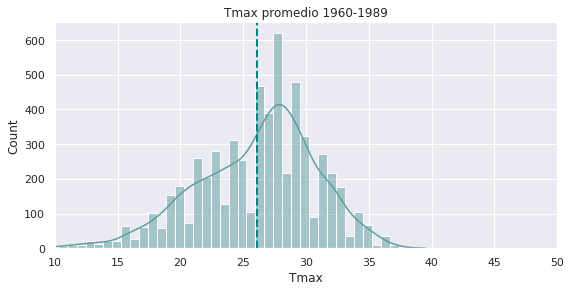

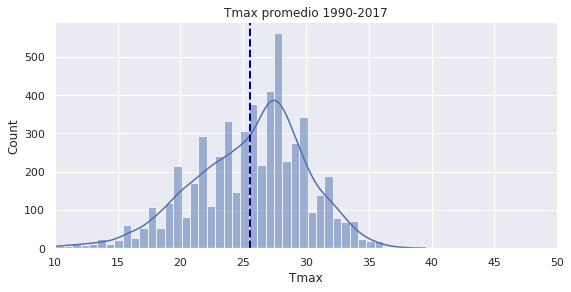

Tmax_promedio df_30 =  25.091158267020333 ºC
Tmax_promedio df_60 =  26.113849287168986 ºC
Tmax_promedio df_90 =  25.51188207801543 ºC


In [ ]:
g1 = sns.displot(df_30.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmax promedio 1930-1959');
g2.set(title='Tmax promedio 1960-1989');
g3.set(title='Tmax promedio 1990-2017');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))


plt.show();

print('Tmax_promedio df_30 = ', df_30.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

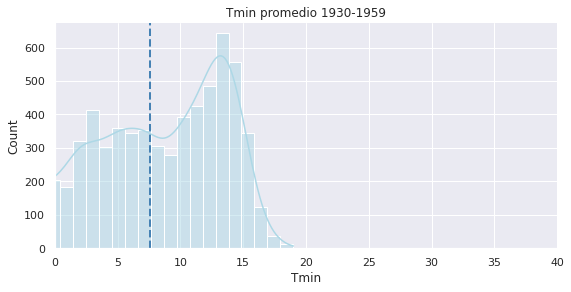

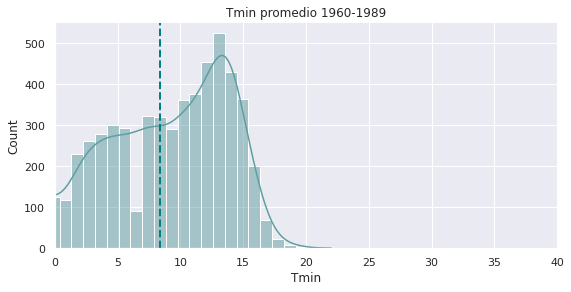

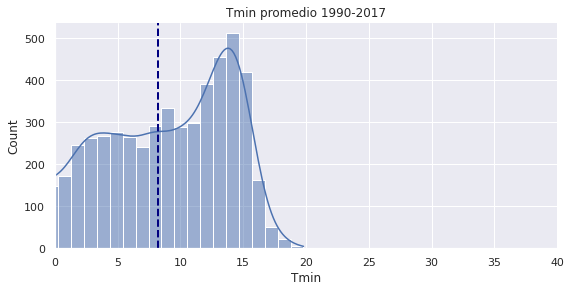

Tmin_promedio df_30 =  7.611936339522546 ºC
Tmin_promedio df_60 =  8.376680244399163 ºC
Tmin_promedio df_90 =  8.22155311882079 ºC
Tmin_sdev df_30 =  5.757687669875081 ºC
Tmin_sdev df_60 =  5.363070499734857 ºC
Tmin_sdev df_90 =  5.6319829129723225 ºC


In [ ]:

g1 = sns.displot(df_30.Tmin, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmin.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmin promedio 1930-1959');
g2.set(title='Tmin promedio 1960-1989');
g3.set(title='Tmin promedio 1990-2017');
g1.set(xlim=(0,40))
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))


plt.show();

print('Tmin_promedio df_30 = ', df_30.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_30 = ', df_30.Tmin.std(), 'ºC' )
print('Tmin_sdev df_60 = ', df_60.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )